In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

file_path = 'drive/MyDrive/DATASETS/finaldfcomcluster.csv'
df = pd.read_csv(file_path)
df.head()

finalDfcomCluster = df.copy()
finalDfcomCluster.info()
finalDfcomCluster.drop(columns=['genres'], inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       45312 non-null  int64  
 1   id                          45312 non-null  int64  
 2   title                       45312 non-null  object 
 3   genres                      45148 non-null  object 
 4   popularity                  45312 non-null  float64
 5   runtime                     45312 non-null  int64  
 6   vote_average                45312 non-null  float64
 7   vote_count                  45312 non-null  float64
 8   budget_log                  45312 non-null  float64
 9   revenue_log                 45312 non-null  float64
 10  release_year                45311 non-null  float64
 11  release_month               45311 non-null  float64
 12  Action                      45312 non-null  int64  
 13  Adventure                   453

In [10]:
finalDfcomCluster.groupby('cluster')[[
    'popularity', 'vote_count', 'vote_average',
    'budget_log', 'revenue_log', 'release_year', 'runtime'
]].mean().round(2)

,popularity,vote_count,vote_average,budget_log,revenue_log,release_year,runtime
cluster,,,,,,,
0,29.78,1021.95,6.48,7.64,8.14,2004.14,102.15
1,2.05,36.06,6.21,0.96,0.58,1987.85,74.74
2,3.37,36.17,6.16,1.39,1.07,1993.59,90.32
3,1.19,39.58,6.08,0.79,0.37,1971.56,39.48
4,6.02,84.75,6.20,2.50,2.19,1998.74,96.78
5,0.60,157.72,5.25,6.01,3.29,2013.56,101.00


In [18]:
finalDfcomCluster["cluster"].value_counts().sort_index()

,count
cluster,
0,17349
1,3188
2,8694
3,318
4,15745
5,18


In [23]:
# prompt: vamos pegar todos os filmes do cluster 5

cluster_5_movies = finalDfcomCluster[finalDfcomCluster['cluster'] == 5]
cluster_5_movies

,index,id,title,genres,popularity,runtime,vote_average,vote_count,budget_log,revenue_log,...,War,Western,continent_Africa,continent_America_do_Norte,continent_America_do_Sul,continent_Asia,continent_Europa,continent_Oceania,continent_Outros,cluster
45294,345566,187028,Omar,Thriller Drama Romance,0.600,96,7.200,138.0,0.000000,0.000000,...,0,0,False,False,False,True,False,False,False,5
45295,351179,184374,Cinco de Mayo: The Battle,War History Drama,0.600,125,7.700,68.0,16.118096,0.000000,...,1,0,False,False,False,False,True,False,False,5
45296,402435,203351,Atlantic Rim,Action Science Fiction,0.600,85,2.500,91.0,13.122363,0.000000,...,0,0,False,True,False,False,False,False,False,5
45297,417695,187672,Mohamed Dubois,Comedy,0.600,92,4.800,110.0,0.000000,0.000000,...,0,0,False,False,False,False,True,False,False,5
45298,418319,157919,Knife Fight,Drama,0.600,99,5.276,29.0,15.761421,0.000000,...,0,0,False,True,False,False,False,False,False,5
45299,418505,182219,Serial Teachers,Comedy,0.600,88,5.500,1112.0,16.300417,0.000000,...,0,0,False,False,False,False,True,False,False,5
45300,421044,174323,G.B.F.,Comedy Drama,0.600,93,5.987,377.0,14.978661,0.000000,...,0,0,False,True,False,False,False,False,False,5
45301,427176,173455,Mistaken for Strangers,Documentary Music Comedy,0.600,75,7.200,47.0,0.000000,11.831088,...,0,0,False,True,False,False,False,False,False,5
45302,428143,204784,Anna Nicole,Drama,0.600,90,5.100,43.0,0.000000,0.000000,...,0,0,False,True,False,False,False,False,False,5
45303,434802,141058,A Viking Saga: The Darkest Day,Adventure Action Thriller,0.600,82,3.900,41.0,0.000000,0.000000,...,0,0,False,True,False,False,False,False,False,5


In [46]:
# Lista das colunas de gênero binárias fornecidas por você
genre_cols = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Family', 'Fantasy', 'Fiction',
    'History', 'Horror', 'Movie', 'Music', 'Mystery',
    'Romance', 'Science', 'TV', 'Thriller', 'War', 'Western'
]

# Verifique se todas as colunas de gênero fornecidas existem no dataframe
missing_genre_cols = [col for col in genre_cols if col not in finalDfcomCluster.columns]

if missing_genre_cols:
    print(f"As seguintes colunas de gênero não foram encontradas no dataframe: {missing_genre_cols}")
    print("Por favor, verifique se os nomes das colunas estão corretos.")
else:
    # Agrupar por cluster e calcular a média das colunas de gênero
    genre_proportion_by_cluster = finalDfcomCluster.groupby('cluster')[genre_cols].mean()

    # Exibir os resultados
    print("Proporção de filmes por gênero dentro de cada cluster:")
    # Exibir com duas casas decimais para melhor legibilidade
    print(genre_proportion_by_cluster.round(2))

    # Para ver os gêneros predominantes em cada cluster, você pode classificar as proporções
    # e exibir os top N gêneros para cada cluster.
    print("\nGêneros predominantes (top 5 por proporção) por cluster:")

    for cluster in genre_proportion_by_cluster.index:
        # Classifique as proporções em ordem decrescente para o cluster atual
        sorted_genres = genre_proportion_by_cluster.loc[cluster].sort_values(ascending=False)

        # Exiba os top 5 (ou o número desejado) gêneros para este cluster
        print(f"\nCluster {cluster}:")
        # Exibir as top 5 proporções com duas casas decimais
        print(sorted_genres.head(5).round(2))



Proporção de filmes por gênero dentro de cada cluster:
         Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
cluster                                                                    
0          0.23       0.15       0.11    0.32   0.13         0.03   0.42   
1          0.06       0.04       0.12    0.36   0.08         0.10   0.40   
2          0.11       0.05       0.07    0.36   0.10         0.08   0.43   
3          0.06       0.03       0.21    0.36   0.03         0.14   0.26   
4          0.13       0.07       0.05    0.35   0.10         0.06   0.44   
5          0.33       0.11       0.00    0.33   0.11         0.06   0.56   

         Family  Fantasy  Fiction  ...  Horror  Movie  Music  Mystery  \
cluster                            ...                                  
0          0.12     0.11     0.11  ...    0.15   0.03   0.03     0.08   
1          0.06     0.05     0.05  ...    0.10   0.03   0.03     0.05   
2          0.06     0.04     0.05  ...    0.

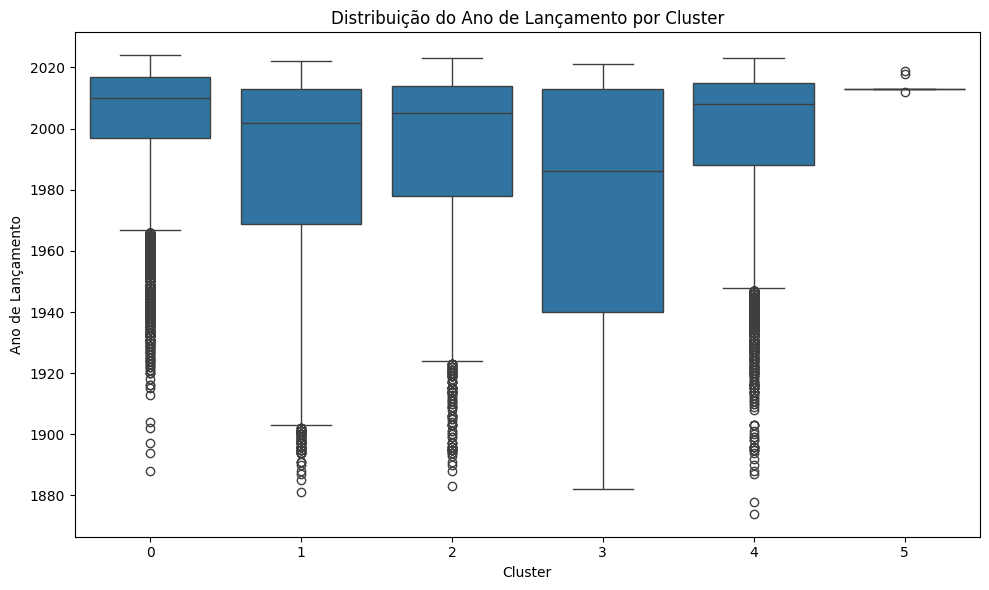

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='release_year', data=finalDfcomCluster)
plt.title('Distribuição do Ano de Lançamento por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ano de Lançamento')
plt.tight_layout()
plt.show()

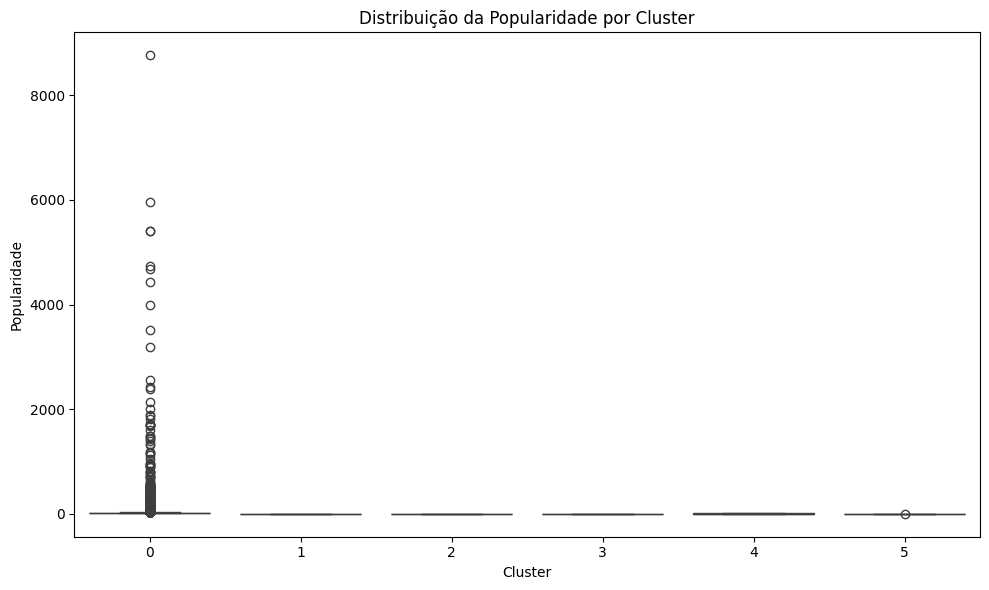

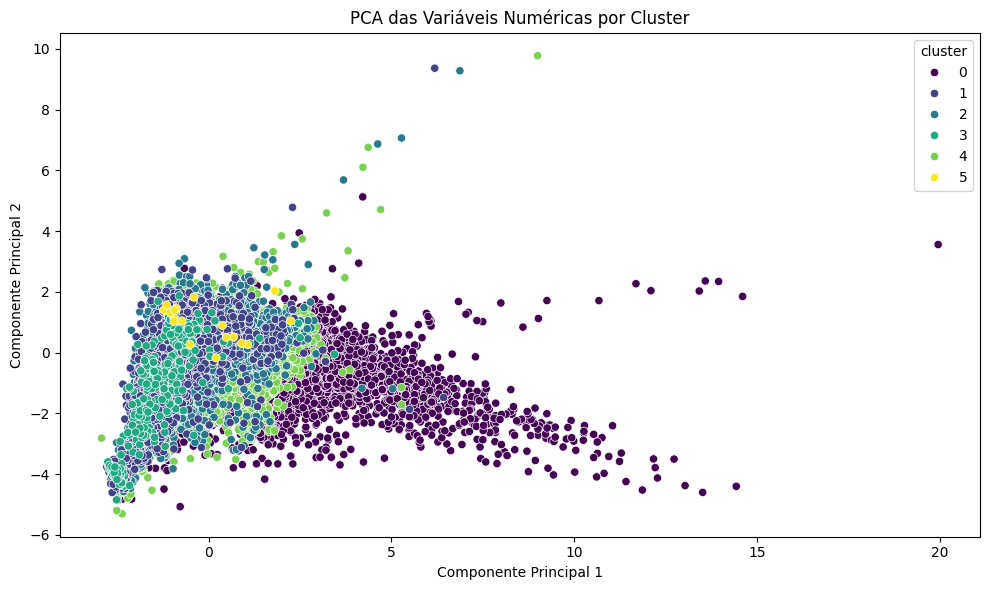

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecione as colunas numéricas para a PCA
numeric_cols = ['popularity', 'vote_count', 'vote_average',
                    'budget_log', 'revenue_log', 'release_year', 'runtime']
X = finalDfcomCluster[numeric_cols].dropna() # Remova linhas com valores ausentes para a PCA

# Escalone os dados antes da PCA (importante!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplique PCA
pca = PCA(n_components=2) # Reduza para 2 componentes
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])
# Adicione a coluna de cluster de volta (garantindo que as linhas correspondam)
# Pode ser necessário ajustar o índice se você removeu linhas com dropna()
pca_df['cluster'] = finalDfcomCluster.loc[X.index, 'cluster'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=pca_df, palette='viridis')
plt.title('PCA das Variáveis Numéricas por Cluster')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.tight_layout()
plt.show()